# inflations impact on gas prices
## Objective

This notebook anaylyzes how inflation has affected the gas prices for Regular, Midgrade, and Premuim gas.

## Data Loading and Preprocessing
- **Data Sources**: We utilized three CSV files containing data on Regular, Midgrade, and Premium gasoline prices.
- **Preprocessing Steps**:
  - loading dta from csv files and removing any unnecessary and unused columns.
  - Assign meaningful column names based on the data structure.
  - Convert the 'Date' column to datetime format for better manipulation.
  - Add a column that takes the year from the 'Date' column to make its own feature called 'Year'.
  - Take the mean of each year to add to a list.

## Yearly Analysis
- **Average Price Calculation**: Compute the average price for each year across all years for each type of gasoline.

## Results
- **yearly Trends**:
  - **2022** showed the highest prices across all types of gasoline, likely due to increased inflation and demand because of covid19.
  - **2009** economic recession in 2008-2009.
- **Comparison Across Gasoline Grades**:
  - Regular, Midgrade, and Premium gasoline prices all followed similar annual patterns, with Premium gasoline consistently being the most expensive and Regular the least.
- **Comparision to Inflation Rate**:
  - The inflation Rate and average gas price per year are very correlated relationship to another.

## Visualizations
- 

## Conclusion


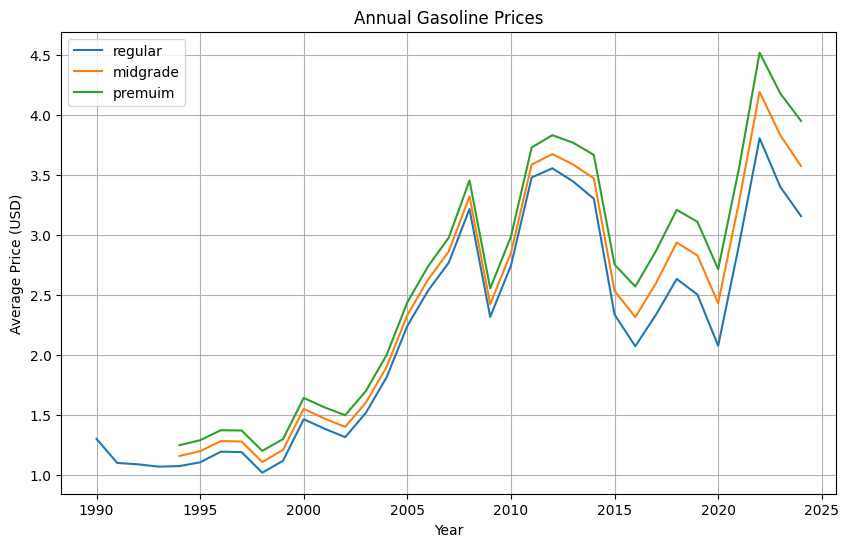

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

new_headers = ['Date', 'Gas Price']

def load_and_preprocess(file_path):
    df = pd.read_csv(file_path, header=2)
    df = df.iloc[:-1, :2]

    df.columns = new_headers
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    return df


df_regular = load_and_preprocess("Data/Data1_Regular_Conventional.csv")
df_midgrade = load_and_preprocess("Data/Data4_Midgrade_Conventional.csv")
df_premuim = load_and_preprocess("Data/Data7_Premuim_Conventional.csv")



average_regular_gas_price_yearly = df_regular.groupby('Year')['Gas Price'].mean()
average_midgrade_gas_price_yearly = df_midgrade.groupby('Year')['Gas Price'].mean()
average_premuim_gas_price_yearly = df_premuim.groupby('Year')['Gas Price'].mean()



plt.figure(figsize=(10, 6))


plt.title('Annual Gasoline Prices')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)

plt.plot(average_regular_gas_price_yearly, label="regular")
plt.plot(average_midgrade_gas_price_yearly, label="midgrade")
plt.plot(average_premuim_gas_price_yearly, label="premuim")

plt.legend()

plt.show()


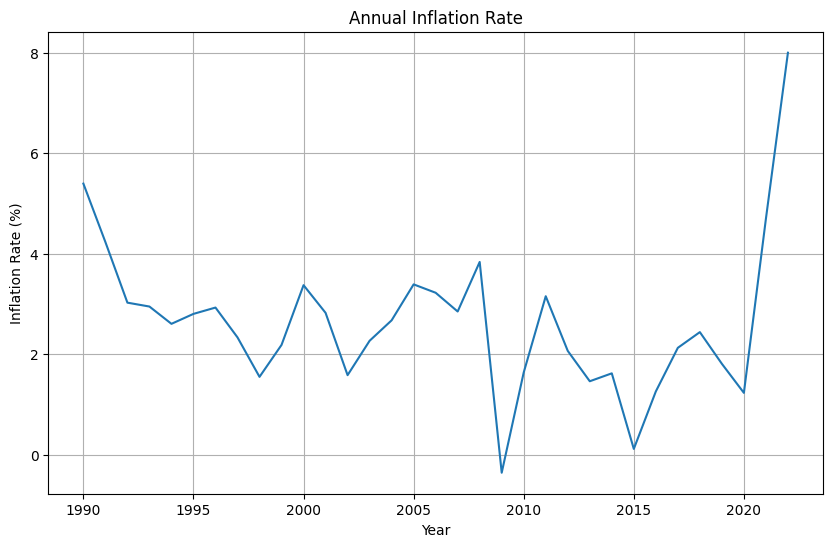

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

new_headers = ['Date', 'Inflation Rate']

df_inflation = pd.read_csv("Data/Inflation_rate_in_US_yearly.csv")
df_inflation.columns = new_headers
df_inflation['Date'] = pd.to_datetime(df_inflation['Date'])
df_inflation['Year'] = df_inflation['Date'].dt.year
df_inflation = df_inflation[df_inflation['Year'] >= 1990]


plt.figure(figsize=(10, 6))


plt.title('Annual Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)

plt.plot(df_inflation["Year"], df_inflation["Inflation Rate"], )


plt.show()



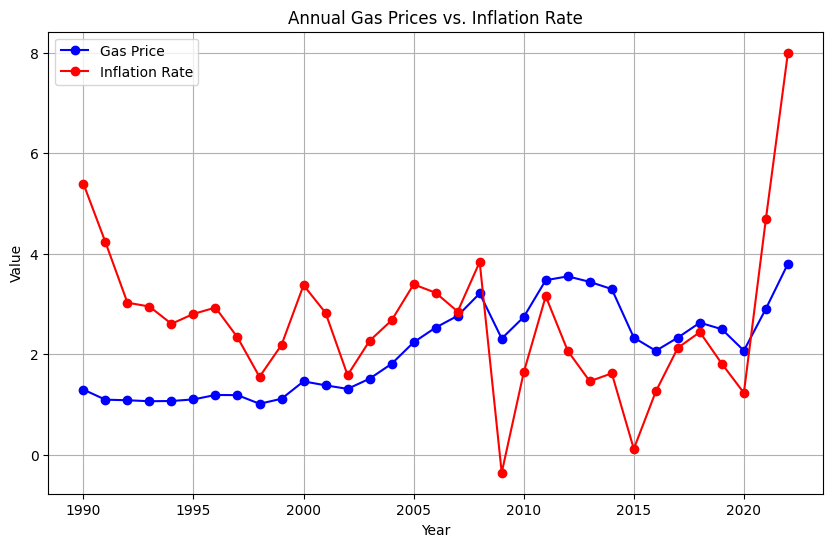

In [5]:
merged_df = pd.merge(average_regular_gas_price_yearly, df_inflation, on='Year', how='inner')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Gas Price'], label='Gas Price', color='blue', marker='o')
plt.plot(merged_df['Year'], merged_df['Inflation Rate'], label='Inflation Rate', color='red', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Annual Gas Prices vs. Inflation Rate')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [6]:
correlation_coefficient = merged_df['Gas Price'].corr(merged_df['Inflation Rate'])

print("Correlation Coefficient between Gas Prices and Inflation Rates:", correlation_coefficient)

Correlation Coefficient between Gas Prices and Inflation Rates: 0.11097959859966378
